# 서울시 지하철호선별 역별 승하차 인원 정보

총 19139 건의 데이터

#### 주요 변수
- 사용일자
- 노선명
- 역명
- 승차총승객수
- 하차총승객수
- 등록일자

요일별 이용패턴, 혼잡도 분석

사용일자, 등록일자 datetime으로 형식 변환

In [206]:
# 데이터 불러오기
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/CARD_SUBWAY_MONTH_202505.csv", index_col=False)  # 파일명은 상황에 맞게 수정

# 기본 정보 확인
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19139 entries, 0 to 19138
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    19139 non-null  int64 
 1   노선명     19139 non-null  object
 2   역명      19139 non-null  object
 3   승차총승객수  19139 non-null  int64 
 4   하차총승객수  19139 non-null  int64 
 5   등록일자    19139 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 897.3+ KB


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20250501,분당선,야탑,17571,18765,20250504
1,20250501,8호선,석촌,6970,8042,20250504
2,20250501,분당선,서현,16548,17173,20250504
3,20250501,경부선,독산,8851,8507,20250504
4,20250501,경부선,수원,35103,38426,20250504


In [207]:
df['사용일자'] = pd.to_datetime(df['사용일자'], format='%Y%m%d')
df['등록일자'] = pd.to_datetime(df['등록일자'], format='%Y%m%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19139 entries, 0 to 19138
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   사용일자    19139 non-null  datetime64[ns]
 1   노선명     19139 non-null  object        
 2   역명      19139 non-null  object        
 3   승차총승객수  19139 non-null  int64         
 4   하차총승객수  19139 non-null  int64         
 5   등록일자    19139 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 897.3+ KB


'요일' 정보 추가

In [209]:
df['요일'] = df['사용일자'].dt.day_name()

In [210]:
df.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일
0,2025-05-01,분당선,야탑,17571,18765,2025-05-04,Thursday
1,2025-05-01,8호선,석촌,6970,8042,2025-05-04,Thursday
2,2025-05-01,분당선,서현,16548,17173,2025-05-04,Thursday
3,2025-05-01,경부선,독산,8851,8507,2025-05-04,Thursday
4,2025-05-01,경부선,수원,35103,38426,2025-05-04,Thursday


In [211]:
요일_매핑 = {
    'Monday': '월', 'Tuesday': '화', 'Wednesday': '수',
    'Thursday': '목', 'Friday': '금', 'Saturday': '토', 'Sunday': '일'
}
df['요일'] = df['사용일자'].dt.day_name().map(요일_매핑)
요일별_데이터 = {요일: group.reset_index(drop=True) for 요일, group in df.groupby('요일')}
print(요일별_데이터['화'].head())

        사용일자  노선명  역명  승차총승객수  하차총승객수       등록일자 요일
0 2025-05-06  경인선  인천    5642    4676 2025-05-09  화
1 2025-05-06  경인선  구일    9855   11039 2025-05-09  화
2 2025-05-06  경인선  소사    4987    4769 2025-05-09  화
3 2025-05-06  경인선  부개    5614    5233 2025-05-09  화
4 2025-05-06  경인선  간석    3942    3660 2025-05-09  화


In [212]:
df.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일
0,2025-05-01,분당선,야탑,17571,18765,2025-05-04,목
1,2025-05-01,8호선,석촌,6970,8042,2025-05-04,목
2,2025-05-01,분당선,서현,16548,17173,2025-05-04,목
3,2025-05-01,경부선,독산,8851,8507,2025-05-04,목
4,2025-05-01,경부선,수원,35103,38426,2025-05-04,목


In [213]:
# 요일별-역명별 승하차 합계 계산
grouped = df.groupby(['요일', '역명'])[['승차총승객수', '하차총승객수']].sum().reset_index()
grouped.head()

,요일,역명,승차총승객수,하차총승객수
0,금,4.19민주묘지,19959,18821
1,금,가능,36549,35121
2,금,가락시장,99146,103007
3,금,가산디지털단지,344092,356070
4,금,가양,126254,122944


In [214]:
# 요일별 최대 승차 인원 역
top_boarding = grouped.loc[grouped.groupby('요일')['승차총승객수'].idxmax()][['요일', '역명', '승차총승객수']]
top_boarding.head()

,요일,역명,승차총승객수
250,금,서울역,656725
778,목,서울역,563184
1306,수,서울역,467134
1834,월,서울역,446421
2628,일,홍대입구,401673


In [215]:
# 요일별 최대 하차 인원 역
top_alighting = grouped.loc[grouped.groupby('요일')['하차총승객수'].idxmax()][['요일', '역명', '하차총승객수']]
top_alighting

,요일,역명,하차총승객수
250,금,서울역,660846
778,목,서울역,557693
1306,수,서울역,452386
1834,월,서울역,438229
2628,일,홍대입구,411264
3157,토,홍대입구,627401
3419,화,서울역,419493


In [216]:
# 노선명별 평균 계산
line_mean = df.groupby('노선명')[['승차총승객수', '하차총승객수']].mean().sort_values(by='승차총승객수', ascending=False)
line_mean 

,승차총승객수,하차총승객수
노선명,,
2호선,27743.467742,28182.409032
1호선,26042.400000,25183.574194
4호선,20187.425558,20658.626551
3호선,15722.867173,15607.281784
7호선,13891.732924,13649.022256
과천선,13600.725806,13450.471774
경인선,13553.219355,13232.353226
경부선,11936.617039,11803.311001
5호선,11630.227535,11484.271889


In [217]:
# 한글폰트 검색
# 폰트 굴림체 있는지 확인
import matplotlib.font_manager as fm
for i in fm.fontManager.ttflist:
    if i.name.find('Gulim') != -1 :
        print(i.name)
        
# 폰트 지정
from matplotlib import rcParams
rcParams['font.family'] = 'Gulim'
rcParams['axes.unicode_minus'] = False

New Gulim
Gulim


<Figure size 1200x600 with 0 Axes>

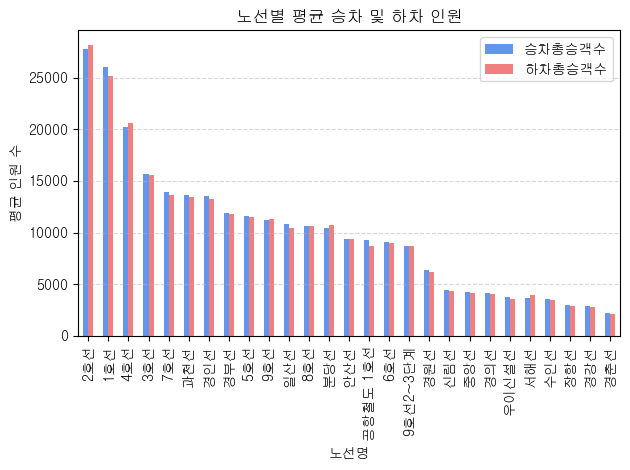

In [218]:
# 그래프 그리기
plt.figure(figsize=(12, 6))
line_mean.plot(kind='bar', stacked=False, color=['cornflowerblue', 'lightcoral'])


plt.title('노선별 평균 승차 및 하차 인원')
plt.ylabel('평균 인원 수')
plt.xlabel('노선명')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

- 2호선의 승차, 하차 모두 평균 인원이 가장 많음 → 서울 도심을 순환하는 노선이며, 업무지·상업지·주거지를 고루 연결하는 중심축임을 반영
- 하위권 노선들 (서해선, 수인선, 경춘선 등) → 평균 승하차 인원수가 적음. 수요 기반이 아직 낮거나 일부 환승 노선으로만 기능 중일 수 있음
- 대부분 노선에서 승차 인원 < 하차 인원 → 중심 업무지역이나 환승 지점에서 하차 수요가 높음을 의미

In [219]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19139 entries, 0 to 19138
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   사용일자    19139 non-null  datetime64[ns]
 1   노선명     19139 non-null  object        
 2   역명      19139 non-null  object        
 3   승차총승객수  19139 non-null  int64         
 4   하차총승객수  19139 non-null  int64         
 5   등록일자    19139 non-null  datetime64[ns]
 6   요일      19139 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 1.0+ MB


In [220]:
print(df['요일'].unique())

['목' '금' '토' '일' '월' '화' '수']


In [221]:
# 요일별 평균 승차 및 하차 인원 계산
weekday_mean = df.groupby('요일')[['승차총승객수', '하차총승객수']].mean().reset_index()
weekday_order = ['월', '화', '수', '목', '금', '토', '일']
weekday_mean['요일'] = pd.Categorical(weekday_mean['요일'], categories=weekday_order, ordered=True)
weekday_mean = weekday_mean.sort_values('요일').reset_index(drop=True)
weekday_mean

,요일,승차총승객수,하차총승객수
0,월,11679.029567,11632.236938
1,화,11853.465399,11806.054229
2,수,13383.697608,13334.464532
3,목,12387.085816,12336.437824
4,금,13474.597604,13418.982519
5,토,9891.028146,9837.277904
6,일,8141.642451,8092.712256


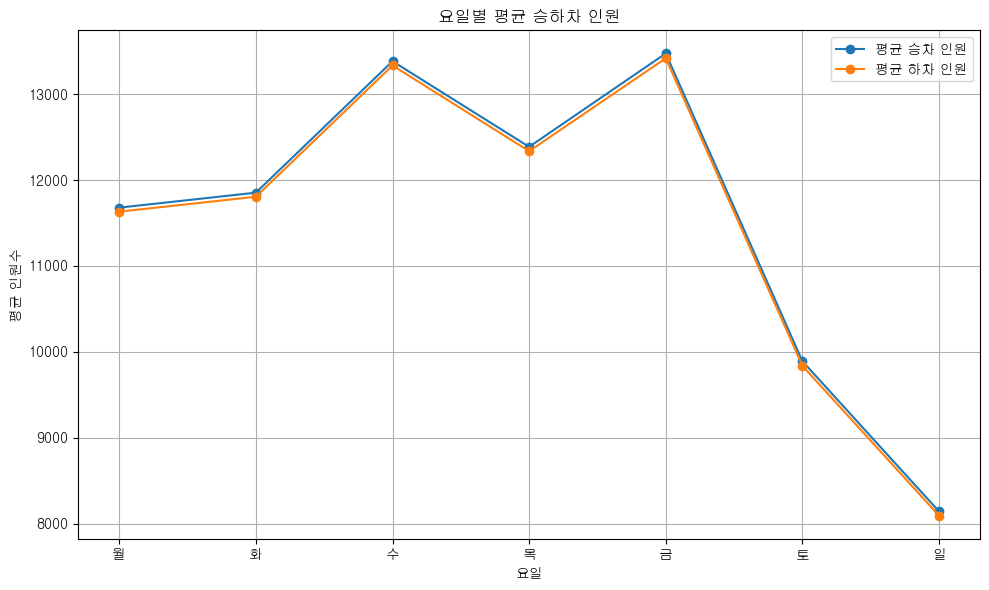

In [ ]:

plt.figure(figsize=(10,6))
plt.plot(weekday_mean['요일'], weekday_mean['승차총승객수'], marker='o', label='평균 승차 인원')
plt.plot(weekday_mean['요일'], weekday_mean['하차총승객수'], marker='o', label='평균 하차 인원')

plt.title('요일별 평균 승하차 인원')
plt.xlabel('요일')
plt.ylabel('평균 인원수')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [222]:
weekday_mean.loc[weekday_mean['승차총승객수'].idxmax()]

요일                   금
승차총승객수    13474.597604
하차총승객수    13418.982519
Name: 4, dtype: object

평균 승하차 인원이 가장 많은 요일은 금요일

In [223]:
# 2호선 요일별 평균 승하차 인원
df_2 = df[df['노선명'] == '2호선']

weekday_2_mean = df_2.groupby('요일')[['승차총승객수', '하차총승객수']].mean().reset_index()

# 요일 순서 정리
weekday_order = ['월', '화', '수', '목', '금', '토', '일']
weekday_2_mean['요일'] = pd.Categorical(weekday_2_mean['요일'], categories=weekday_order, ordered=True)
weekday_2_mean = weekday_2_mean.sort_values('요일').reset_index(drop=True)

weekday_2_mean

,요일,승차총승객수,하차총승객수
0,월,27718.800,28139.525
1,화,28311.640,28781.695
2,수,32088.520,32644.630
3,목,29816.256,30292.640
4,금,32735.612,33316.752
5,토,23826.532,24227.556
6,일,18919.915,19051.635


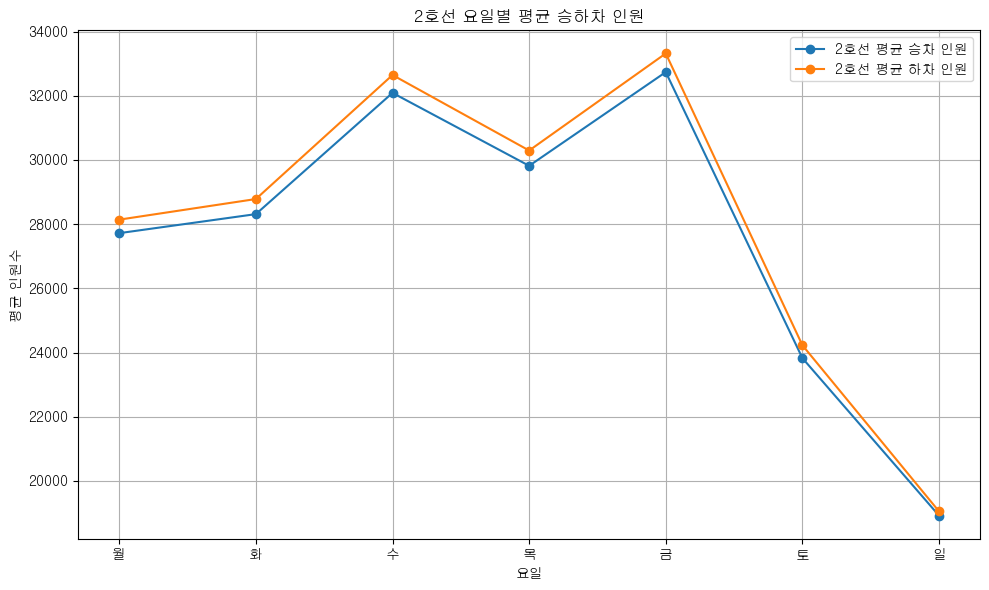

In [224]:

plt.figure(figsize=(10,6))
plt.plot(weekday_2_mean['요일'], weekday_2_mean['승차총승객수'], marker='o', label='2호선 평균 승차 인원')
plt.plot(weekday_2_mean['요일'], weekday_2_mean['하차총승객수'], marker='o', label='2호선 평균 하차 인원')

plt.title('2호선 요일별 평균 승하차 인원')
plt.xlabel('요일')
plt.ylabel('평균 인원수')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


2호선 요일별 평균 승하차 인원을 봤을때 승차인원보다 하차 인원이 많음
승차 보다는 하차+환승이 많은 것으로 보임

In [225]:
df_2.info()
df_2.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1550 entries, 132 to 18762
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   사용일자    1550 non-null   datetime64[ns]
 1   노선명     1550 non-null   object        
 2   역명      1550 non-null   object        
 3   승차총승객수  1550 non-null   int64         
 4   하차총승객수  1550 non-null   int64         
 5   등록일자    1550 non-null   datetime64[ns]
 6   요일      1550 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 96.9+ KB


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일
132,2025-05-01,2호선,시청,15518,14123,2025-05-04,목
133,2025-05-01,2호선,을지로입구,33056,32450,2025-05-04,목
134,2025-05-01,2호선,을지로3가,15218,13686,2025-05-04,목
135,2025-05-01,2호선,을지로4가,10433,10642,2025-05-04,목
136,2025-05-01,2호선,동대문역사문화공원(DDP),14208,16725,2025-05-04,목


In [226]:
# 2호선 역별 총 하차 인원수 계산
station_exit_mean = df_2.groupby('역명')['하차총승객수'].mean().reset_index()
station_exit_mean = station_exit_mean.sort_values('하차총승객수', ascending=False)
station_exit_mean.head(10)

,역명,하차총승객수
49,홍대입구,83301.000000
42,잠실(송파구청),81129.225806
0,강남,73276.548387
27,신림,53009.548387
4,구로디지털단지,52683.354839
21,성수,52207.774194
16,삼성(무역센터),50640.129032
26,신도림,48240.677419
33,역삼,47764.032258
40,을지로입구,47424.000000


2호선 평균 하차 인원이 가장 많은 곳 홍대입구

In [227]:
df_station_flow = df.groupby('역명')[['승차총승객수', '하차총승객수']].sum().reset_index()
df_station_flow['유입_유출_차이'] = df_station_flow['하차총승객수'] - df_station_flow['승차총승객수']
df_station_flow

,역명,승차총승객수,하차총승객수,유입_유출_차이
0,4.19민주묘지,124590,118469,-6121
1,가능,199984,192621,-7363
2,가락시장,513445,530217,16772
3,가산디지털단지,1627708,1692652,64944
4,가양,658736,643582,-15154
...,...,...,...,...
524,회기,876779,834308,-42471
525,회룡,410645,404628,-6017
526,회현(남대문시장),860340,898454,38114
527,효창공원앞,331085,322567,-8518


In [228]:
# 하차 중심 역 (유입 많은 역)
top_arrival = df_station_flow.sort_values('유입_유출_차이', ascending=False).head(10)

# 승차 중심 역 (유출 많은 역)
top_departure = df_station_flow.sort_values('유입_유출_차이', ascending=True).head(10)

In [229]:
top_arrival.head()

,역명,승차총승객수,하차총승객수,유입_유출_차이
517,홍대입구,2953394,3148722,195328
359,역삼,1311519,1480685,169166
267,성수,1491009,1618441,127432
95,노원,1256983,1370360,113377
512,합정,1412442,1506112,93670


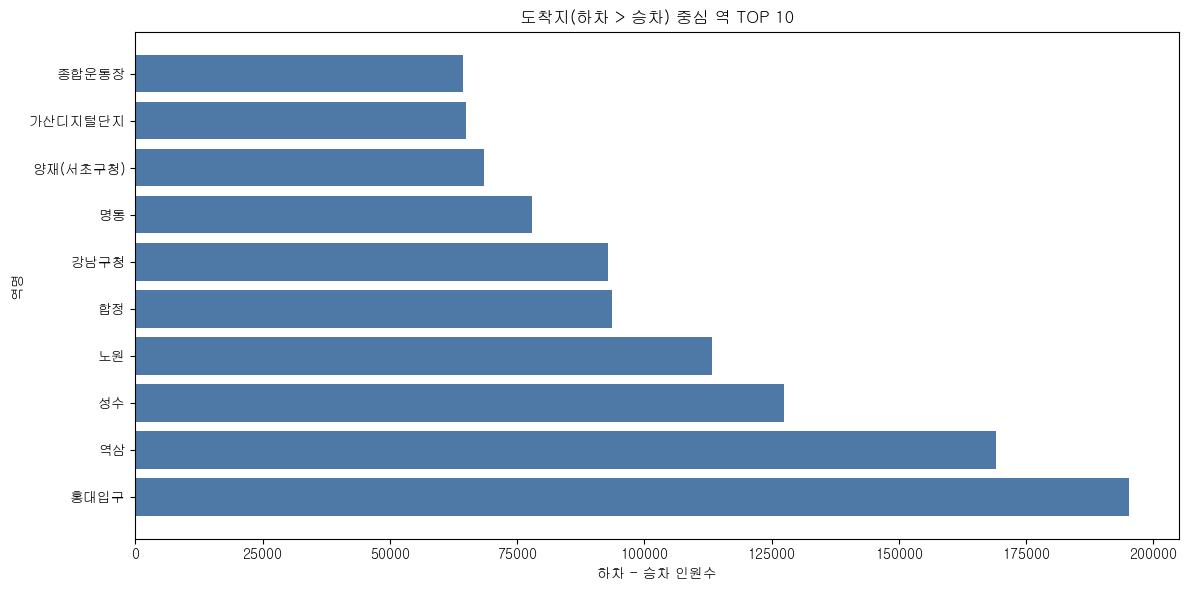

In [230]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# 막대 길이
x = top_arrival['유입_유출_차이']
y = top_arrival['역명']

plt.barh(y, x, color='#4E79A7')
plt.title('도착지(하차 > 승차) 중심 역 TOP 10')
plt.xlabel('하차 - 승차 인원수')
plt.ylabel('역명')
plt.tight_layout()
plt.show()

- 유입_유출_차이 > 0 → 하차 > 승차 → 도착지 중심 (직장/업무지역 가능성 높음)
- 유입_유출_차이 < 0 → 승차 > 하차 → 출발지 중심 (거주지역 가능성 높음)

도착지 중심인 곳은 업무지, 유흥지, 환승 허브가 많음
혼잡도 완화를 위해서 출구 혼잡도 관리, 상시 유도 인력이 필요